In [2]:
# importing nacessary libraries
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# reading the .pkl file which containes the list of features required
df = pd.read_pickle("merged_all_table.pkl", compression='bz2')

In [4]:
# checking the shape of the data
df.shape

(25979, 68)

In [5]:
# checking for null values
df.isna().sum()

match_api_id                            0
home_team_api_id                        0
away_team_api_id                        0
goal                                11762
shoton                              11762
shotoff                             11762
foulcommit                          11762
card                                11762
cross                               11762
corner                              11762
possession                          11762
B365H                                3387
B365D                                3387
B365A                                3387
BWH                                  3404
BWD                                  3404
BWA                                  3404
IWH                                  3459
IWD                                  3459
IWA                                  3459
LBH                                  3423
LBD                                  3423
LBA                                  3423
PSH                               

# Preprocessing

In [6]:
# creating a deep copy of match 
match_df = df.copy()

In [7]:
match_df.columns

Index(['match_api_id', 'home_team_api_id', 'away_team_api_id', 'goal',
       'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner',
       'possession', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA',
       'BSH', 'BSD', 'BSA', 'league_name', 'country_name', 'team_api_id',
       'team_long_name', 'team_short_name', 'team_overall_score',
       'home_total_goal', 'away_total_goal', 'home_players_avg_overall_rating',
       'home_players_avg_overall_score', 'home_players_avg_ideal_body_rate',
       'away_players_avg_overall_rating', 'away_players_avg_overall_score',
       'away_players_avg_ideal_body_rate', 'home_total_win',
       'home_total_loose', 'home_total_draw', 'away_total_win',
       'away_total_loose', 'away_total_draw', 'league_home_total_win',
       'league_home_total_loose', 'league_home_total_draw',
 

In [8]:
# #droping some columns
# cols_to_drop =['match_api_id' ,'home_team_api_id' ,'away_team_api_id','PSH', 'PSD', 'PSA','GBH', 'GBD', 'GBA','BSH', 'BSD', 'BSA','home_player_X1' ,'home_player_X2' ,'home_player_X3' ,'home_player_X4' ,'home_player_X5' ,'home_player_X6' ,
#                'home_player_X7' ,'home_player_X8' ,'home_player_X9' ,'home_player_X10' ,'home_player_X11' ,'away_player_X1' ,'away_player_X2' ,
#                'away_player_X3' ,'away_player_X4' ,'away_player_X5' ,'away_player_X6' ,'away_player_X7' ,'away_player_X8' ,'away_player_X9' ,
#                'away_player_X10' ,'away_player_X11' ,'home_player_Y1' ,'home_player_Y2' ,'home_player_Y3' ,'home_player_Y4' ,'home_player_Y5' ,
#                'home_player_Y6' ,'home_player_Y7' ,'home_player_Y8' ,'home_player_Y9' ,'home_player_Y10' ,'home_player_Y11' ,'away_player_Y1' ,
#                'away_player_Y2' ,'away_player_Y3' ,'away_player_Y4' ,'away_player_Y5' ,'away_player_Y6' ,'away_player_Y7' ,'away_player_Y8' ,
#                'away_player_Y9' ,'away_player_Y10' ,'away_player_Y11' ,'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' ,
#                'possession','season', 'stage', 'date','country_name', 'league_name','season','stage','date',"goal", "shoton", "shotoff", "foulcommit", "card", "cross", "corner", "possession"]
# match_df.drop(columns=cols_to_drop, inplace = True)

# # before removing bets
# cols_to_drop =['match_api_id' ,'PSH', 'PSD', 'PSA','GBH', 'GBD', 'GBA','BSH', 'BSD', 'BSA',
#                'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' , 'possession',
#                'country_name', 'league_name', 'team_long_name', 'team_short_name']
# match_df.drop(columns=cols_to_drop, inplace = True)

# removing bets too
cols_to_drop =['match_api_id' , 'B365H', 'B365D', 'B365A', 'BWH',
                'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD',
                'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
                'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'team_api_id',
               'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' , 'possession',
               'country_name', 'league_name', 'team_long_name', 'team_short_name']
match_df.drop(columns=cols_to_drop, inplace = True)

In [9]:
# shape after dropping columns
match_df.shape

(25979, 24)

In [10]:
# creating input and output for the model
X = match_df.drop(columns=['target'])
y= match_df[['target']]

In [11]:
# input shape
X.shape

(25979, 23)

In [12]:
# checking for data types
X.dtypes

home_team_api_id                      int64
away_team_api_id                      int64
team_overall_score                  float64
home_total_goal                       int64
away_total_goal                       int64
home_players_avg_overall_rating     float64
home_players_avg_overall_score      float64
home_players_avg_ideal_body_rate    float64
away_players_avg_overall_rating     float64
away_players_avg_overall_score      float64
away_players_avg_ideal_body_rate    float64
home_total_win                        int64
home_total_loose                      int64
home_total_draw                       int64
away_total_win                        int64
away_total_loose                      int64
away_total_draw                       int64
league_home_total_win                 int64
league_home_total_loose               int64
league_home_total_draw                int64
league_away_total_win                 int64
league_away_total_loose               int64
league_away_total_draw          

## Handling Missing Values

In [13]:
# handling missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Perform missing value imputation using 'mean' strategy for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X = numeric_imputer.fit_transform(X)
sc = StandardScaler()
X_preprocess = sc.fit_transform(X)
le = LabelEncoder()
y_le_encoded = le.fit_transform(y)

C:\Users\Sudip Bhattarai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\Sudip Bhattarai\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Define the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB(),
    # SVC(),
    RandomForestClassifier(),
    xgb.XGBClassifier(),
    LGBMClassifier()
]
# Loop through each classifier and compute the accuracy
for classifier in classifiers:
    scores = cross_val_score(classifier,X_preprocess, y_le_encoded, cv=5)
    avg_accuracy = scores.mean()
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {avg_accuracy}\n")

Classifier: LogisticRegression
Accuracy: 0.5383193261122609

Classifier: DecisionTreeClassifier
Accuracy: 0.3941654311712348

Classifier: GaussianNB
Accuracy: 0.5083341150111028

Classifier: RandomForestClassifier
Accuracy: 0.4927064944456423

Classifier: XGBClassifier
Accuracy: 0.49224466736461975

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3213
[LightGBM] [Info] Number of data points in the train set: 20783, number of used features: 23
[LightGBM] [Info] Start training from score -1.246886
[LightGBM] [Info] Start training from score -1.370967
[LightGBM] [Info] Start training from score -0.779271
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

In [21]:
# only bets features
# Classifier: LogisticRegression
# Accuracy: 0.5200735666215441

# added 'country_id' ,'league_id' ,'season' ,'stage' with bets
# Classifier: LogisticRegression
# Accuracy: 0.4584877313636536

# with bets
# Classifier: LogisticRegression
# Accuracy: 0.5321219921150571

# Classifier: DecisionTreeClassifier
# Accuracy: 0.3985523698173097

# Classifier: GaussianNB
# Accuracy: 0.3997069041781603

# Classifier: SVC
# Accuracy: 0.5260017070953372

# Classifier: RandomForestClassifier
# Accuracy: 0.49928845836102553

# Classifier: XGBClassifier
# Accuracy: 0.48962709154372847

# Classifier: LGBMClassifier
# Accuracy: 0.5067175535189948

In [22]:
def calculate_performance_metrics(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate performance metrics
    accuracy = cm.diagonal().sum() / cm.sum()
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    
    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)

In [23]:
def print_cm(y_test,y_pred):
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [24]:
def feature_importance(model_name):
    # plotting the important features from the input for better understanding
    importances= model_name.feature_importances_
    forest_importances = pd.Series(importances, index=(match_df.drop(columns=['target'])).columns)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(forest_importances)
    ax.set_title("Feature importances")
    ax.set_ylabel("FI")
    fig.tight_layout()

### Train Test split for the Models

In [99]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocess,y_le_encoded, stratify=y_le_encoded, test_size=0.3, random_state=42)

## Running SMOTE
In this section we are trying to use SMOTE technique which is a oversampling technique to balance the classes and run logistic regression to see if there is any changes to the accuracy of the model.

In [29]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X_train_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

In [30]:
len(X_train_oversampled),len(X_train)

(25026, 18185)

In [31]:
np.unique(y_oversampled, return_counts=True)

(array([0, 1, 2]), array([8342, 8342, 8342], dtype=int64))

In [32]:
## Lets do the logistic regression
# checking using randomforest
lr = LogisticRegression()
lr.fit(X_train_oversampled,y_oversampled)

# predicting using LGBM model
y_pred_lr_smote = lr.predict(X_test)

In [33]:
# checking for the accuracy
lr.score(X_test,y_test)

0.49191685912240185

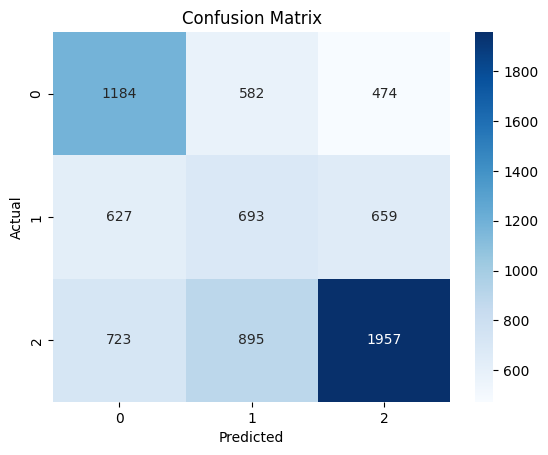

In [34]:
print_cm(y_test,y_pred_lr_smote)

## Checking LGBM

In [35]:
# defining the LGBM model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

# predicting using LGBM model
y_pred_lgbm = lgbm_classifier.predict(X_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3323
[LightGBM] [Info] Number of data points in the train set: 18185, number of used features: 23
[LightGBM] [Info] Start training from score -1.246951
[LightGBM] [Info] Start training from score -1.370852
[LightGBM] [Info] Start training from score -0.779294


In [36]:
# checking for the accuracy
lgbm_classifier.score(X_test,y_test)

0.5201437002822684

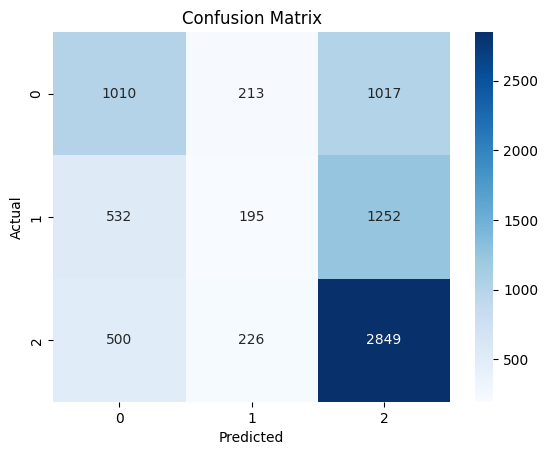

In [37]:
print_cm(y_test,y_pred_lgbm)

In [38]:
calculate_performance_metrics(y_test,y_pred_lgbm)

Accuracy: 0.5201437002822684
Precision: 0.47558195111122836
Recall: 0.5201437002822684
F1 Score: 0.47413145596860407


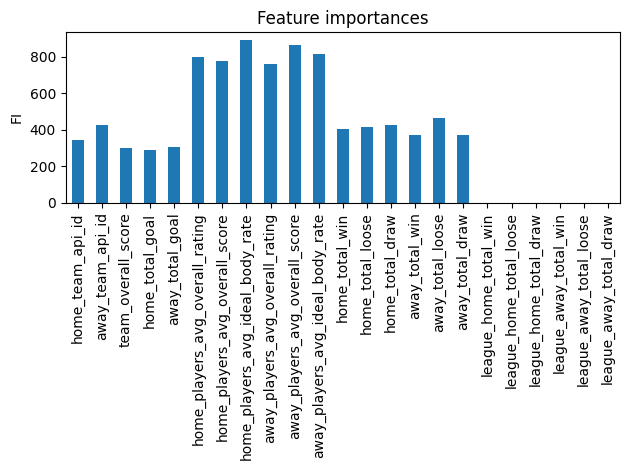

In [39]:
feature_importance(lgbm_classifier)

## Checking Random Forest

In [40]:
# checking using randomforest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# predicting using LGBM model
y_pred_rf = rf.predict(X_test)

In [41]:
# checking for the accuracy
rf.score(X_test,y_test)

0.48267898383371827

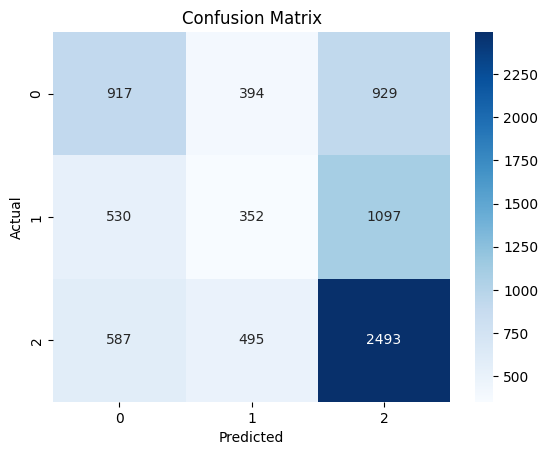

In [42]:
print_cm(y_test,y_pred_rf)

In [43]:
calculate_performance_metrics(y_test,y_pred_rf)

Accuracy: 0.48267898383371827
Precision: 0.45463471533106875
Recall: 0.48267898383371827
F1 Score: 0.46139544767968316


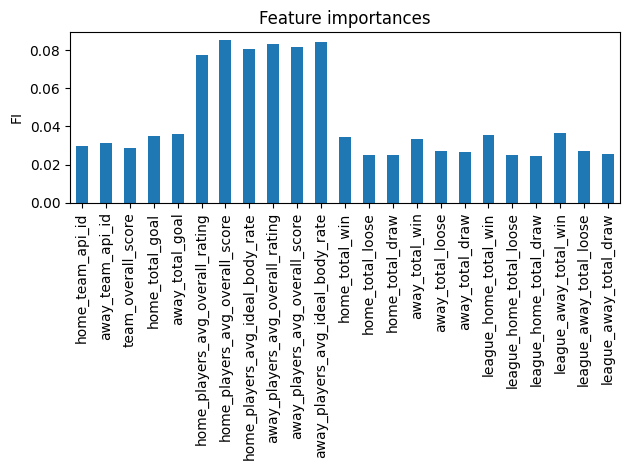

In [44]:
feature_importance(rf)

## Checking Logistic Regression

In [45]:
# checking using randomforest
lr = LogisticRegression()
lr.fit(X_train,y_train)

# predicting using LGBM model
y_pred_lr = lr.predict(X_test)

In [46]:
# checking for the accuracy
lr.score(X_test,y_test)

0.5381062355658198

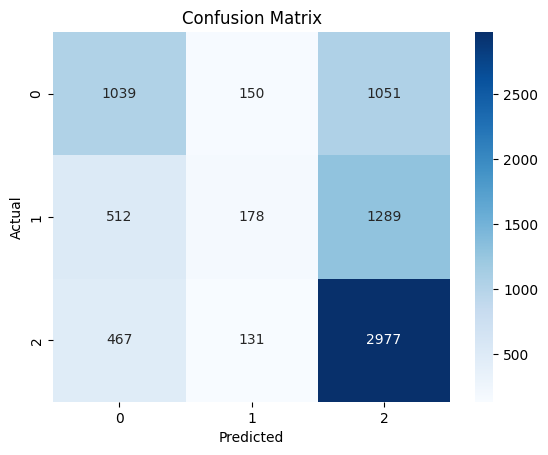

In [47]:
print_cm(y_test,y_pred_lr)

In [48]:
calculate_performance_metrics(y_test,y_pred_lr)

Accuracy: 0.5381062355658198
Precision: 0.5032596871648551
Recall: 0.5381062355658198
F1 Score: 0.48446667465988946


## Checking Decision Classifier

In [49]:
# checking using randomforest
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# predicting using LGBM model
y_pred_dt = dt.predict(X_test)

In [50]:
# checking for the accuracy
dt.score(X_test,y_test)

0.4090325891711573

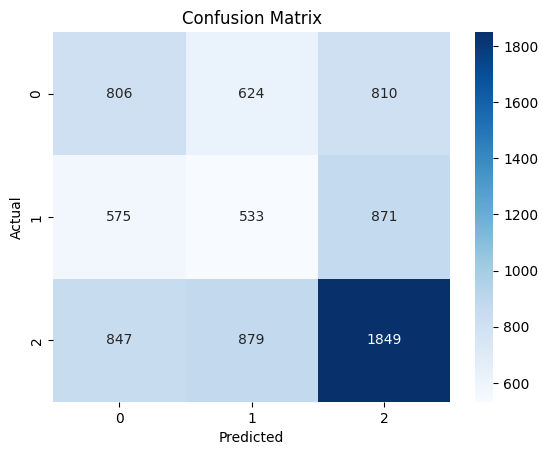

In [51]:
print_cm(y_test,y_pred_dt)

In [52]:
calculate_performance_metrics(y_test,y_pred_dt)

Accuracy: 0.4090325891711573
Precision: 0.4106992595507087
Recall: 0.4090325891711573
F1 Score: 0.4098420092110544


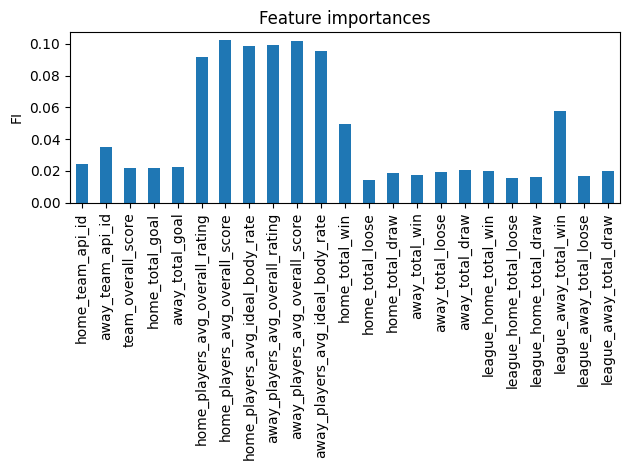

In [53]:
feature_importance(dt)

## Checking Naive Bays

In [54]:
# checking using randomforest
nb = GaussianNB()
nb.fit(X_train,y_train)

# predicting using LGBM model
y_pred_nb = nb.predict(X_test)

In [55]:
# checking for the accuracy
nb.score(X_test,y_test)

0.5091095714652296

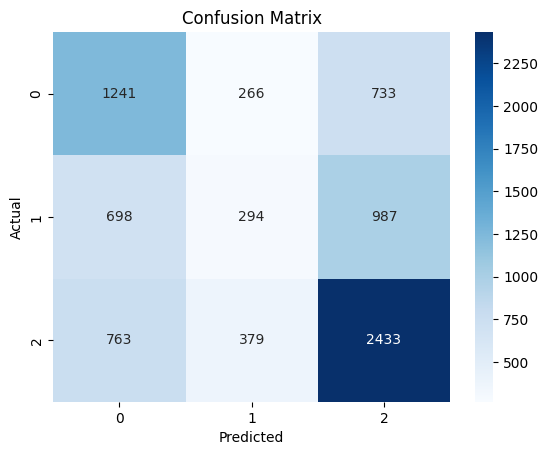

In [56]:
print_cm(y_test,y_pred_nb)

In [57]:
calculate_performance_metrics(y_test,y_pred_nb)

Accuracy: 0.5091095714652296
Precision: 0.48021745849199576
Recall: 0.5091095714652296
F1 Score: 0.48432110098792197


## Checking SVC

In [58]:
# checking using randomforest
svc = SVC()
svc.fit(X_train,y_train)

# predicting using LGBM model
y_pred_svc = svc.predict(X_test)

In [59]:
# checking for the accuracy
svc.score(X_test,y_test)

0.5297664870413138

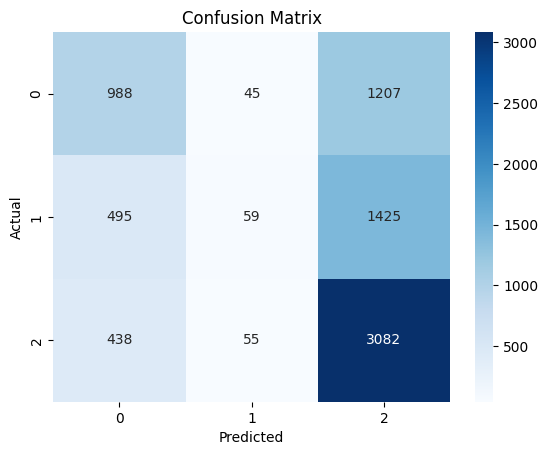

In [60]:
print_cm(y_test,y_pred_svc)

In [61]:
calculate_performance_metrics(y_test,y_pred_svc)

Accuracy: 0.5297664870413138
Precision: 0.4894386974012557
Recall: 0.5297664870413138
F1 Score: 0.45487161556217487


## Checking XGB

In [62]:
# checking using randomforest
xb = xgb.XGBClassifier()
xb.fit(X_train,y_train)

# predicting using LGBM model
y_pred_xb = xb.predict(X_test)

In [63]:
# checking for the accuracy
xb.score(X_test,y_test)

0.50846805234796

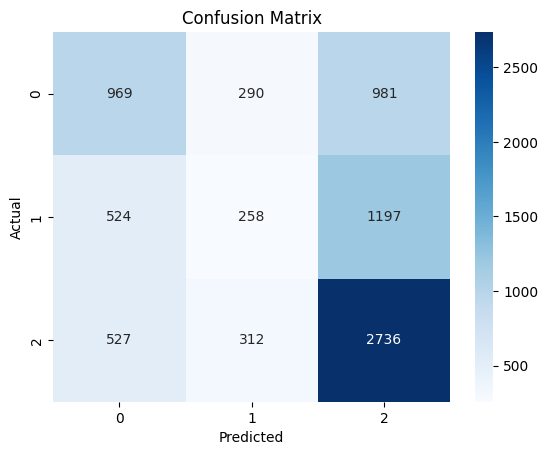

In [64]:
print_cm(y_test,y_pred_xb)

In [65]:
calculate_performance_metrics(y_test,y_pred_xb)

Accuracy: 0.50846805234796
Precision: 0.46942659019008687
Recall: 0.50846805234796
F1 Score: 0.47256540101576455


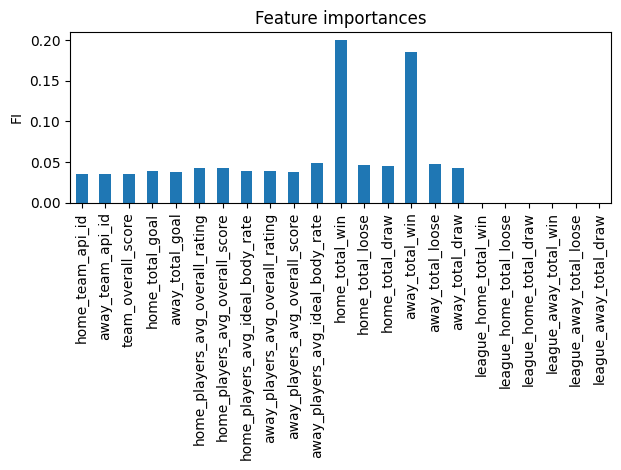

In [66]:
feature_importance(xb)

## Neural Network Model (Test)

In [118]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [119]:
# Create an instance of the OneHotEncoder
oh = OneHotEncoder()

# Fit and transform the categorical data
oh_encoded = oh.fit_transform(y_train.reshape(-1, 1))

# Convert the encoded data to a dense array
oh_encoded = oh_encoded.toarray()

# Fit and transform the categorical data
oh_encoded_test = oh.fit_transform(y_test.reshape(-1, 1))

# Convert the encoded data to a dense array
oh_encoded_test = oh_encoded_test.toarray()

In [139]:
# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(518, activation='relu', input_shape=(23,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [140]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 518)               12432     
                                                                 
 dropout_33 (Dropout)        (None, 518)               0         
                                                                 
 dense_56 (Dense)            (None, 256)               132864    
                                                                 
 dropout_34 (Dropout)        (None, 256)               0         
                                                                 
 dense_57 (Dense)            (None, 128)               32896     
                                                                 
 dropout_35 (Dropout)        (None, 128)               0         
                                                                 
 dense_58 (Dense)            (None, 24)              

In [141]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [142]:
# Train the model
history = model.fit(X_train,oh_encoded, epochs=5, batch_size=24,validation_data=(X_test,oh_encoded_test))

Epoch 1/5
758/758 [==============================] - 3s 3ms/step - loss: 0.9841 - accuracy: 0.5257 - val_loss: 0.9814 - val_accuracy: 0.5304
Epoch 2/5
758/758 [==============================] - 4s 5ms/step - loss: 0.9728 - accuracy: 0.5352 - val_loss: 0.9719 - val_accuracy: 0.5308
Epoch 3/5
758/758 [==============================] - 5s 6ms/step - loss: 0.9680 - accuracy: 0.5376 - val_loss: 0.9732 - val_accuracy: 0.5335
Epoch 4/5
758/758 [==============================] - 3s 3ms/step - loss: 0.9656 - accuracy: 0.5384 - val_loss: 0.9721 - val_accuracy: 0.5323
Epoch 5/5
758/758 [==============================] - 4s 5ms/step - loss: 0.9652 - accuracy: 0.5417 - val_loss: 0.9708 - val_accuracy: 0.5334


In [137]:
## Let's plot the loss and accuracy curve of the NN model
def plot_loss_acc_curve(history):
    plt.plot(history.history['accuracy'],c = 'Red',label='Training-Accuracy')
    plt.plot(history.history['val_accuracy'],c='blue',label='Validation-Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accurcay-Curve')
    plt.figure()
    plt.plot(history.history['loss'],c='red',label='Training-Loss')
    plt.plot(history.history['val_loss'],c='blue',label='Validation-Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss-Curve')
    plt.legend()
    plt.show()

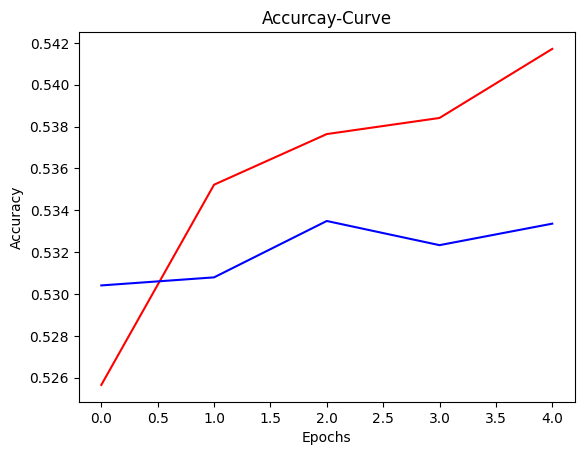

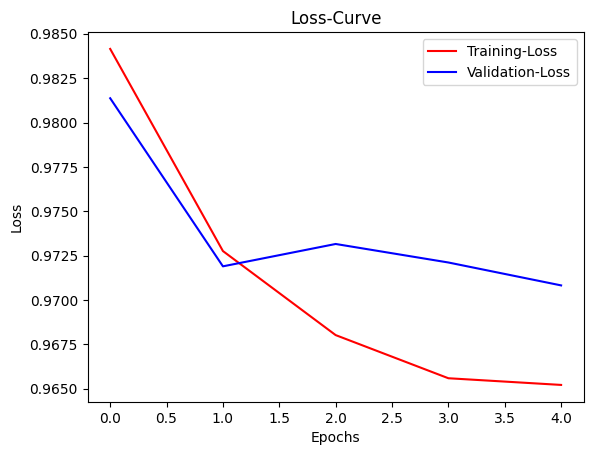

In [143]:
plot_loss_acc_curve(history)

In [82]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, oh_encoded_test)

244/244 [==============================] - 1s 2ms/step - loss: 1.1470 - accuracy: 0.5005


In [83]:
# Make predictions
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1)

244/244 [==============================] - 1s 2ms/step


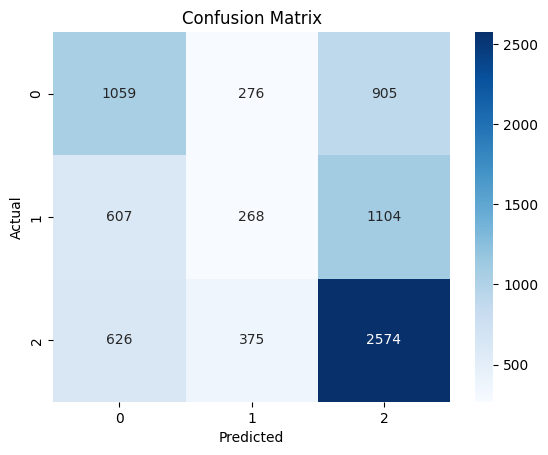

In [84]:
print_cm(y_test,predicted_labels)

In [85]:
calculate_performance_metrics(y_test,y_pred_xb)

Accuracy: 0.50846805234796
Precision: 0.46942659019008687
Recall: 0.50846805234796
F1 Score: 0.47256540101576455
